In [13]:
import folium
import pandas as pd
import geopandas as gpd
import os

import matplotlib.pyplot as plt
from matplotlib.patches import Patch

import networkx as nx



In [ ]:
%%time



# Load & Read GeoJSON file
file_path = "/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/physical_grid_data/US_Electric_Power_Transmission_Lines_-3845977064911730921.geojson"
gdf = gpd.read_file(file_path)


# Convert timeframes to folium-friendly types
gdf['SOURCEDATE'] = pd.to_datetime(gdf['SOURCEDATE']).dt.strftime('%Y-%m-%dT%H:%M:%S')
gdf['VAL_DATE'] = pd.to_datetime(gdf['VAL_DATE']).dt.strftime('%Y-%m-%dT%H:%M:%S')
gdf.plot()

Text(0.5, 1.0, 'Major US Transmission Lines')

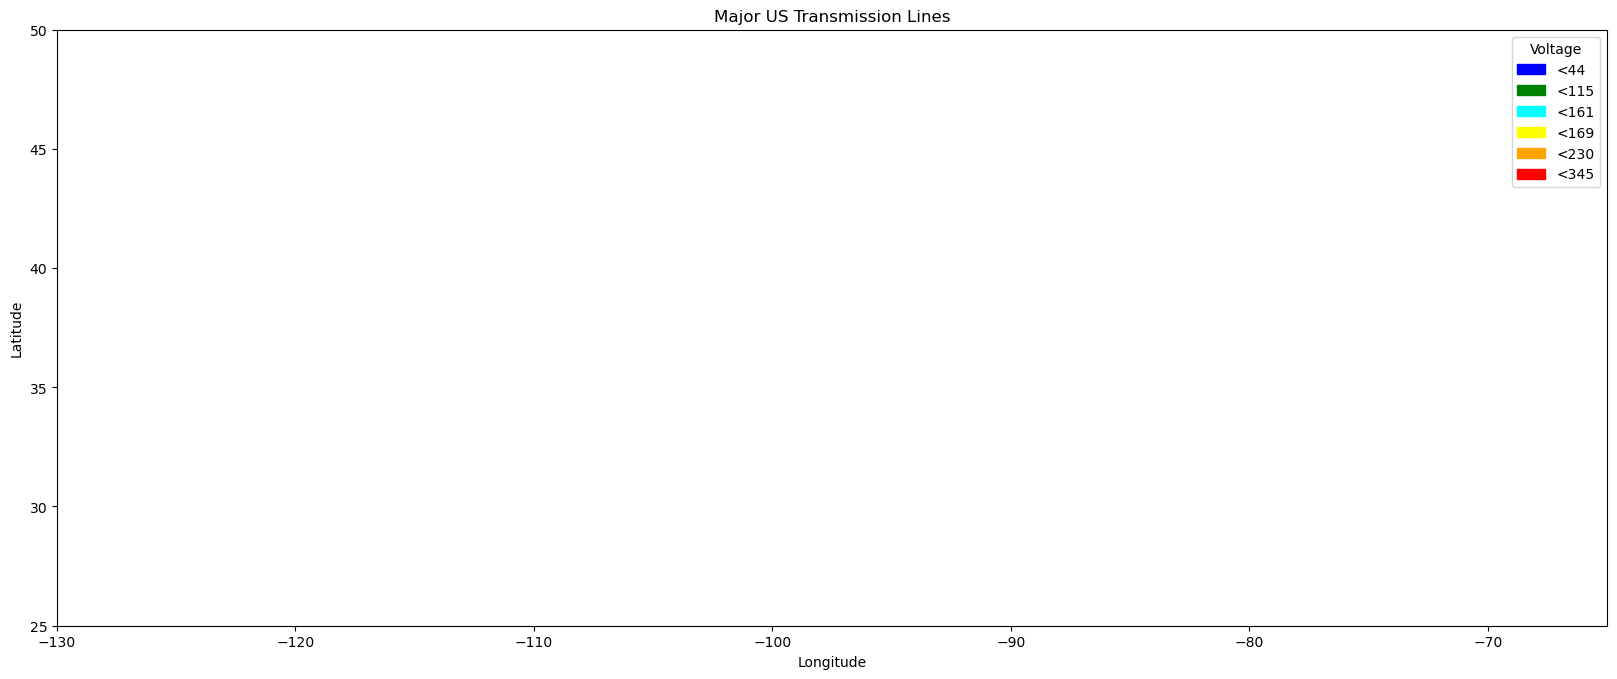

In [18]:
# Plot the GeoDataFrame
map = gdf.plot(figsize=(20, 16),linewidth=0.5)

# Define common voltages and corresponding colors
common_voltages = [0, 44, 115, 161, 169, 230, 345]

hex_colors = ['blue','green', 'cyan', 'yellow', 'orange', 'red']
legend_labels = ['<' + str(i) for i in common_voltages[1:]]

# Plot overlays for each common voltage
for voltage, color, label in zip(common_voltages, hex_colors, legend_labels):
    overlay = gdf[gdf['VOLTAGE'] > voltage]  # Filter GeoDataFrame based on voltage
    overlay.plot(ax=map, marker='o', color=color, markersize=5, linewidth=0.5, label=label)
    
# Create a custom legend with colored patches
legend_handles = [Patch(color=color, label=label) for color, label in zip(hex_colors, legend_labels)]

# Add legend
map.legend(handles=legend_handles, title='Voltage', loc='upper right')

# Set xy axis limits
map.set_xlim((-130, -65))
map.set_ylim((25,50))

# Put labels on the map
map.set_xlabel("Longitude")
map.set_ylabel("Latitude")
map.set_title("Major US Transmission Lines")

In [24]:

# Create a graph
G = nx.Graph()

# Iterate over each row in the GeoDataFrame
for _, row in gdf.iterrows():
    if row['geometry'].geom_type == 'MultiLineString':
        # If the geometry is a multi-part linestring, iterate over each part
        for line in row['geometry']:
            start = line.coords[0]
            end = line.coords[-1]
            G.add_edge(start, end, geometry=line)
    elif row['geometry'].geom_type == 'LineString':
        # If the geometry is a single linestring, extract start and end points
        start = row['geometry'].coords[0]
        end = row['geometry'].coords[-1]
        G.add_edge(start, end, geometry=row['geometry'])

# Plot the graph
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='gray', linewidth=0.5)
for edge in G.edges(data=True):
    if isinstance(edge[2]['geometry'], list):  # Handle MultiLineString
        for line in edge[2]['geometry']:
            x, y = line.xy
            ax.plot(x, y, color='blue', linewidth=1, alpha=0.5)
    else:
        x, y = edge[2]['geometry'].xy
        ax.plot(x, y, color='blue', linewidth=1, alpha=0.5)
plt.title('Graph of Electric Power Grid Transmission Lines')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


TypeError: 'MultiLineString' object is not iterable

In [33]:
row['geometry'].explode()

AttributeError: 'MultiLineString' object has no attribute 'explode'

In [37]:
for g in gdf['geometry']:
    if not g.geom_type == 'LineString':
        print(g)

MULTILINESTRING ((-8401375.2609 4846540.4437, -8401252.3 4846513.07, -8400860.55 4846205.5301, -8400551.23 4845967.8599, -8400255.0301 4845656.15, -8400023.93 4845410.71, -8399667.42 4845246.49, -8398788.4 4844860.73, -8398587.1501 4844568.71, -8398387.7 4844268.34, -8398197.2 4843984.6801, -8398036.57 4843760.75, -8397856.8201 4843503.9701, -8397695.12 4843276.61), (-8397615.57 4843164.77, -8397695.12 4843276.61, -8397397 4842857.23, -8397196.9499 4842564.03, -8397021.39 4842515.2599, -8397003.17 4842510.16, -8396988.09 4842505.9401, -8396979.37 4842503.5, -8396869.7 4842472.6699, -8396486.9199 4842354.43, -8396182.96 4842265.44, -8395942.31 4842106.6, -8395728.52 4841962.0899, -8395535.04 4841741.7301, -8395514.75 4841451.52, -8395573.1089 4841267.9941, -8395435.1131 4841164.6719))
MULTILINESTRING ((-10812342.21 4181671.5501, -10812362.59 4181671.34), (-10817740.5619 4181682.3655, -10817643.23 4181680.22, -10817480.81 4181679.92, -10817273.89 4181680.22, -10817158.39 4181678.97, -108

MULTILINESTRING ((-10923800.567 4230186.0005, -10923823.85 4230171.12, -10924055.85 4230172.31, -10924228.41 4230172.04, -10924399.21 4230171.12, -10924647.02 4230169.94, -10924940.53 4230168.7499, -10925215.22 4230167.57, -10925521.87 4230165.17, -10925753.28 4230164.8399, -10925938.69 4230163.98, -10926215.47 4230163.98, -10926488.69 4230165.45, -10926777.11 4230166.96, -10926918.9301 4230166.06, -10927176.91 4230166.3601, -10927401.14 4230163.38, -10927691.09 4230161.56, -10927907.54 4230160.99, -10928121.34 4230160.36, -10928398.7099 4230158.6001, -10928591.91 4230157.9799, -10928810.75 4230157.41, -10929037.3901 4230154.1, -10929254.1601 4230154.1, -10929480.17 4230152.94, -10929678.43 4230151.43, -10929828.63 4230150.22, -10930000.02 4230149.6201, -10930169.01 4230150.8, -10930381.01 4230150.52, -10930718.41 4230151.71, -10930940.84 4230152.03, -10931199.71 4230151.43, -10931371.39 4230152.6401, -10931558.62 4230152.8999, -10931832.42 4230153.8001, -10932074.27 4230152.31, -10932

In [34]:
gdf_exploded = gdf.explode()

/var/folders/56/vhtxcmr565z5ksdt3g3px27w0000gq/T/ipykernel_68886/2915452980.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  gdf_exploded = gdf.explode()


In [40]:
gdf['SUB_1'].values

array(['Waters River', 'Phillips Bend', 'Tap140359', ..., 'Tap204261',
       'Tap161754', 'Unknown202234'], dtype=object)

In [43]:
subs1 = [s1 for s1 in gdf['SUB_1'].values]
subs2 = [s2 for s2 in gdf['SUB_2'].values]
subs_total = list(set(subs1+subs2))

In [45]:
len(subs_total)

67802

In [35]:
gdf_exploded

,,OBJECTID_1,OBJECTID,ID,TYPE,STATUS,NAICS_CODE,NAICS_DESC,SOURCE,SOURCEDATE,VAL_METHOD,VAL_DATE,OWNER,VOLTAGE,VOLT_CLASS,INFERRED,SUB_1,SUB_2,SHAPE__Len,GlobalID,geometry
0,0,1,1,100511,AC; Overhead,In Service,221121,Electric Bulk Power Transmission and Control,"Imagery, EIA 861, EIA 860",2016-11-08T00:00:00,Imagery,2017-03-27T00:00:00,Not Available,115.0,100-161,Yes,Waters River,Tap136228,79.523416,f1500a3a-804a-4da4-b6f6-bd0fbb2cf36d,"LINESTRING (-7895730.480 5242757.621, -7895714..."
1,0,2,2,140809,AC; Overhead,In Service,221121,Electric Bulk Power Transmission and Control,"Imagery, EIA 860",2014-04-16T00:00:00,Imagery,2017-02-15T00:00:00,Kingsport Power Co,161.0,100-161,Yes,Phillips Bend,John Sevier,24018.513114,58c24e54-d758-4071-9ebf-d83beb60c707,"LINESTRING (-9235201.986 4352619.803, -9235164..."
2,0,3,3,140837,AC; Overhead,In Service,221121,Electric Bulk Power Transmission and Control,"Imagery, https://www9.nationalgridus.com/oasis...",2015-06-16T00:00:00,Imagery,2019-03-05T00:00:00,Niagara Mohawk Power Corp.,115.0,100-161,Yes,Tap140359,Tap140373,5972.919614,c40bbff1-b1ed-4905-9ff6-1a80b7b422fc,"LINESTRING (-8386149.901 5325598.749, -8386170..."
3,0,4,4,140811,AC; Overhead,In Service,221121,Electric Bulk Power Transmission and Control,"Imagery, OpenStreetMap",2014-06-20T00:00:00,Imagery,2017-03-20T00:00:00,"Entergy New Orleans, Llc",115.0,100-161,Yes,Gentilly Road,Michoud Station,14253.092823,f09483e3-5419-4b94-aac5-a6450f2452c4,"LINESTRING (-10011772.054 3504713.336, -100118..."
4,0,5,5,140813,AC; Overhead,In Service,221121,Electric Bulk Power Transmission and Control,"Imagery, EIA 860",2016-10-04T00:00:00,Imagery/other,2018-05-09T00:00:00,Midamerican Energy Co,161.0,100-161,Yes,Unknown137689,Tap137690,8950.844317,36ac4f5e-ad18-47c2-bb7d-8ba64b7fa822,"LINESTRING (-10081770.755 5103118.400, -100816..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94211,0,94212,94212,313969,AC; Overhead,In Service,221121,Electric Bulk Power Transmission and Control,Imagery,2018-08-28T00:00:00,Imagery/other,2022-05-24T00:00:00,Sulphur Springs Valley Electric Cooperative,69.0,Under 100,No,Tap302103,Stewart,14234.316259,e2d37fb1-dca0-406f-9033-d692f5f4bc99,"LINESTRING (-12231279.367 3794689.527, -122312..."
94212,0,94213,94213,313970,AC; Overhead,In Service,221121,Electric Bulk Power Transmission and Control,Imagery,2018-10-16T00:00:00,Imagery/other,2022-05-24T00:00:00,Graham County Electric Cooperative Incorporated,69.0,Under 100,No,Tap300244,Hackberry,25444.741067,3c2f7c5c-728d-4ce3-b663-c2555474b534,"LINESTRING (-12201126.658 3878726.331, -122017..."
94213,0,94214,94214,202495,AC; Overhead,Not Available,221121,Electric Bulk Power Transmission and Control,Imagery,2019-04-10T00:00:00,Imagery,2019-04-10T00:00:00,City Of Gering - (Ne),115.0,100-161,No,Tap204261,Unknown202234,106510.794263,00225744-4cf6-4f33-9d8a-6f458515cad8,"LINESTRING (-11627704.590 5169657.957, -116276..."
94214,0,94215,94215,202496,AC; Overhead,Not Available,221121,Electric Bulk Power Transmission and Control,Imagery,2019-04-10T00:00:00,Imagery,2019-04-10T00:00:00,City Of Gering - (Ne),115.0,100-161,No,Tap161754,Tap204258,49097.232454,17d49594-e00f-4a93-b602-fe5992196552,"LINESTRING (-11562785.810 5132975.450, -115628..."


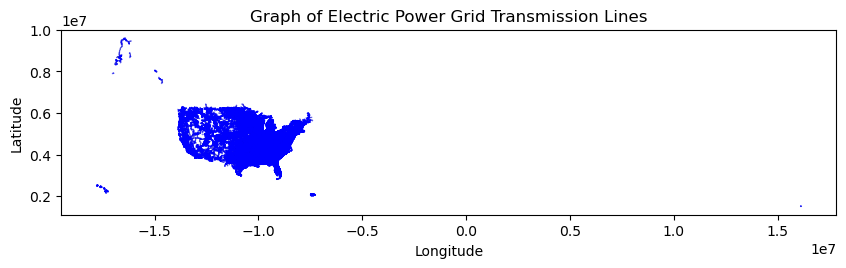

In [47]:

# Create a graph
G = nx.Graph()

# Iterate over each row in the GeoDataFrame
for _, row in gdf_exploded.iterrows():
    if row['geometry'].geom_type == 'MultiLineString':
        # If the geometry is a multi-part linestring, iterate over each part
        for line in row['geometry']:
            start = line.coords[0]
            end = line.coords[-1]
            G.add_edge(start, end, geometry=line)
    elif row['geometry'].geom_type == 'LineString':
        # If the geometry is a single linestring, extract start and end points
        start = row['geometry'].coords[0]
        end = row['geometry'].coords[-1]
        G.add_edge(start, end, geometry=row['geometry'])

# Plot the graph
fig, ax = plt.subplots(figsize=(10, 10))
gdf_exploded.plot(ax=ax, color='gray', linewidth=0.5)
for edge in G.edges(data=True):
    if isinstance(edge[2]['geometry'], list):  # Handle MultiLineString
        for line in edge[2]['geometry']:
            x, y = line.xy
            ax.plot(x, y, color='blue', linewidth=1, alpha=0.5)
    else:
        x, y = edge[2]['geometry'].xy
        ax.plot(x, y, color='blue', linewidth=1, alpha=0.5)
plt.title('Graph of Electric Power Grid Transmission Lines')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [53]:
len(G.edges)


89946

In [52]:
len(G.nodes)

74881